# Statistical Arbitrage Strategy

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import timedelta
from datetime import datetime
import yfinance as yf
import statsmodels.api as sm
import seaborn as sns
import statsmodels.tsa.stattools as ts 
import statsmodels.formula.api as smf
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.reset_option('all')
import statsmodels.regression.linear_model as sm
import itertools

/Users/elena/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# get 10 assets' data
tickers = ['PNC','HSBC','C','USB','RY','GS','JPM','BAC','WFC','BMO']
def get_data(tickers):
    df = yf.download(tickers, start="2010-01-01",end="2022-12-31")[["Adj Close"]]
    df.columns = tickers
    df = df.ffill().dropna()
    df = df/df.iloc[0]
    return df

data = get_data(tickers)
data

[*********************100%%**********************]  10 of 10 completed


,PNC,HSBC,C,USB,RY,GS,JPM,BAC,WFC,BMO
Date,,,,,,,,,,
2010-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2010-01-05,1.032505,0.994783,1.038235,1.017680,1.015947,1.019370,1.010091,0.990409,1.025350,1.027452
2010-01-06,1.044615,0.986026,1.070588,1.006817,1.017147,1.024971,1.010091,0.989303,1.036276,1.028916
2010-01-07,1.079032,0.973915,1.073530,1.026520,1.013889,1.045274,1.064847,0.986351,1.056381,1.066252
2010-01-08,1.069471,0.971679,1.055882,1.007107,1.011660,1.042708,1.067651,0.989303,1.058129,1.056369
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,2.466309,2.836693,1.573104,2.452786,0.993766,4.270289,4.004042,2.835720,2.626377,2.101952
2022-12-27,2.470866,2.850201,1.577724,2.427655,0.997941,4.285252,4.028321,2.850143,2.653735,2.105030
2022-12-28,2.489096,2.815645,1.585899,2.419846,0.996657,4.308671,4.025738,2.816789,2.635496,2.109133


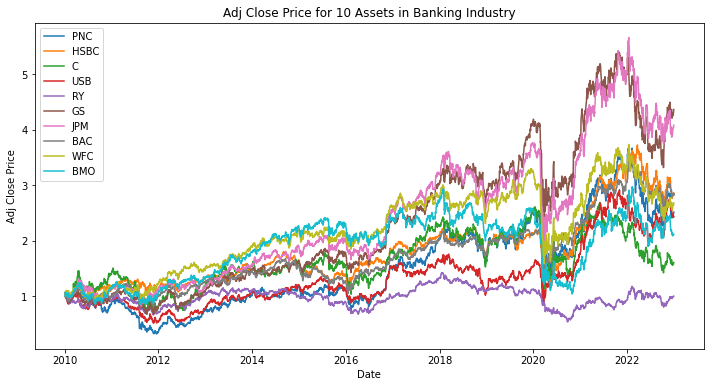

In [19]:
plt.figure(figsize = (12,6))
plt.plot(data[tickers])
plt.legend(tickers)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Adj Close Price for 10 Assets in Banking Industry')
plt.show()

In [5]:
# use itertools.combinations to generate all possible combinations
pairs = list(itertools.combinations(tickers,2))
len(pairs)

45

In [6]:
# Test Cointegration
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.tsatools import add_trend

def check_price_stationarity(data, significance_level=0.05):
    result = adfuller(data.diff().fillna(0.))
    return result[1] <= significance_level

def check_residual_stationarity(data, significance_level=0.05):
    result = adfuller(data)
    return result[1] <= significance_level

def test_cointegration(series_1, series_2):
    if (check_price_stationarity(series_1) == True) & (check_price_stationarity(series_2) == True):
    
        X = sm.add_constant(series_1)  
        model = sm.OLS(series_2, X).fit()
        residuals = model.resid

        if check_residual_stationarity(residuals):
            return True, "The series are cointegrated"
        else:
            return False, "The series are not cointegrated"
        
    else:
        return False, "One or both series are not stationary"
    
coint_pairs = []

for pair in pairs:
    p1 = list(pair)[0]
    p2 = list(pair)[1]
    print("pairs " , p1, " & ", p2)
    
    series_1 = data[p1]
    series_2 = data[p2]
    
    is_cointegrated, message = test_cointegration(series_1,series_2)
    print(message)
    
    if message == "The series are cointegrated":
        coint_pairs.append([p1,p2])
    

pairs  PNC  &  HSBC
The series are cointegrated
pairs  PNC  &  C
The series are not cointegrated
pairs  PNC  &  USB
The series are not cointegrated
pairs  PNC  &  RY
The series are not cointegrated
pairs  PNC  &  GS
The series are not cointegrated
pairs  PNC  &  JPM
The series are cointegrated
pairs  PNC  &  BAC
The series are cointegrated
pairs  PNC  &  WFC
The series are not cointegrated
pairs  PNC  &  BMO
The series are not cointegrated
pairs  HSBC  &  C
The series are not cointegrated
pairs  HSBC  &  USB
The series are cointegrated
pairs  HSBC  &  RY
The series are not cointegrated
pairs  HSBC  &  GS
The series are not cointegrated
pairs  HSBC  &  JPM
The series are cointegrated
pairs  HSBC  &  BAC
The series are not cointegrated
pairs  HSBC  &  WFC
The series are not cointegrated
pairs  HSBC  &  BMO
The series are not cointegrated
pairs  C  &  USB
The series are not cointegrated
pairs  C  &  RY
The series are not cointegrated
pairs  C  &  GS
The series are not cointegrated
pairs  

In [7]:
print(coint_pairs)

[['PNC', 'HSBC'], ['PNC', 'JPM'], ['PNC', 'BAC'], ['HSBC', 'USB'], ['HSBC', 'JPM'], ['USB', 'JPM'], ['USB', 'BAC'], ['JPM', 'BAC']]


In [8]:
#for pair in coint_pairs:
pair = coint_pairs[2]
p1 = list(pair)[0]
p2 = list(pair)[1]

def create_temp_data(Mean = 600,SD=300,z=1.5):
    
    temp_data = pd.DataFrame(data[[p1,p2]]) 
    Z = z

    #calculate the hedge ratio
    model=sm.regression.linear_model.OLS(temp_data[p1], temp_data[p2])
    model = model.fit()
    hedge = model.params[0]
    temp_data["Hedge"] = hedge
    temp_data["Spread"] = temp_data[p1] - (temp_data[p2] * hedge)
    temp_data["Mean"] = (temp_data["Spread"]).rolling(Mean).mean()
    temp_data["SD"] = (temp_data["Spread"]).rolling(SD).std()
    temp_data["Upper"] = temp_data["Mean"] + (Z * temp_data["SD"])
    temp_data["Lower"] = temp_data["Mean"] - (Z * temp_data["SD"])
    return temp_data

def strategy_signals_1(data,Stop_loss = 1,Z=1.5):
    
    data["Signals"] = 0.
    data["SD_start"] = 1000.
    data["start"] = 0.
    
    for i in range(1, len(data)):
        
        # Short Condition
        if data["Upper"][i] < data["Spread"][i]:
            data["Signals"][i] = -1.
        if (data["Signals"][i-1] == -1.) & (data["Spread"][i] > data["Mean"][i] + 0.2 * Z * data["SD"][i]):
            data["Signals"][i] = -1.
            
        # Long Condition
        if data["Lower"][i] > data["Spread"][i]:
            data["Signals"][i] = 1.
        if (data["Signals"][i-1] == 1.) & (data["Spread"][i] < data["Mean"][i] - 0.2 * Z * data["SD"][i]):
            data["Signals"][i] = 1.
        
        #Stop-loss Order
        if Stop_loss == 1:
            
            #Step 1: record "the start date of long/short" and "the SD on start date"
            if data["Signals"][i] == 0.:
                data["SD_start"][i] = 0.
                data["start"][i] = 0.
            elif (data["Signals"][i-1] == 0.) & (data["Signals"][i] == -1):
                data["SD_start"][i] = data["SD"][i]
                data["start"][i] = i
            elif (data["Signals"][i-1] == 0.) & (data["Signals"][i] == 1):
                data["SD_start"][i] = data["SD"][i]
                data["start"][i] = i
            else:
                data["SD_start"][i] = data["SD_start"][i-1]
                data["start"][i] = data["start"][i-1]

            # Step 2: conditions to stop loss
            if (data["Signals"][i] == -1.) & (data["Mean"][i] >= data["Mean"][int(data["start"][i])] + data["SD_start"][i]):
                data["Signals"][i] = 0.
            elif (data["Signals"][i] == 1.) & (data["Mean"][i] <= data["Mean"][int(data["start"][i])] - data["SD_start"][i]):
                data["Signals"][i] = 0.

            # Step 3: conditions to remain silence
            if (data["Upper"][i-1] < data["Spread"][i-1]) & (data["Signals"][i-1] == 0):
                data["Signals"][i] = 0.
            elif (data["Lower"][i-1] > data["Spread"][i-1]) & (data["Signals"][i-1] == 0):
                data["Signals"][i] = 0.  
        
    return(data)

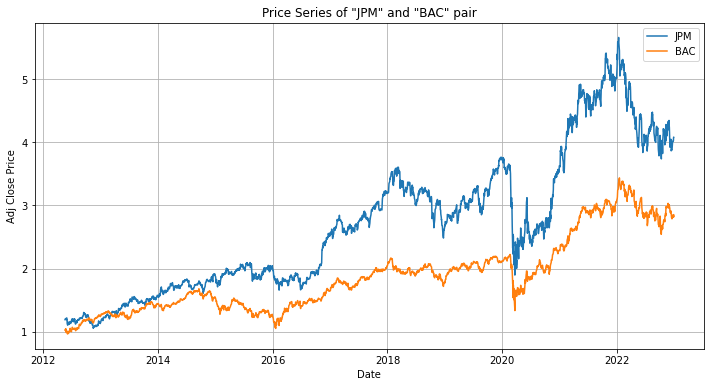

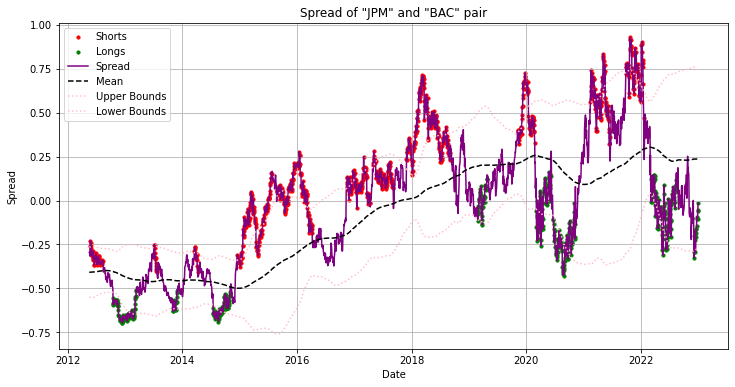

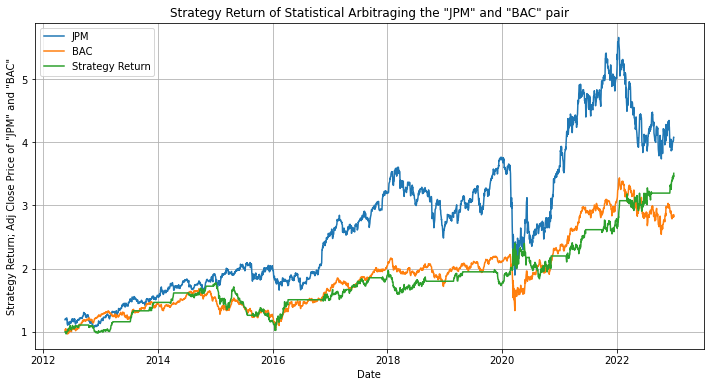

In [33]:
# PNC & BAC Pair
pair = coint_pairs[7]
p1 = list(pair)[0]
p2 = list(pair)[1]

temp_data = create_temp_data()
temp_data = strategy_signals_1(temp_data)

temp_data = temp_data.ffill().dropna()
temp_data["asset1"] = temp_data[p1].pct_change()
temp_data["asset2"] = temp_data[p2].pct_change()
temp_data["Return"] = (temp_data["asset1"] - (temp_data["Hedge"] * temp_data["asset2"])) * temp_data["Signals"].shift(1)
temp_data["cumulReturn"] = np.cumprod((temp_data["Return"]).fillna(0)+1)

longs = temp_data["Spread"][temp_data["Signals"] == 1.]
shorts = temp_data["Spread"][temp_data["Signals"] == -1.]

# Two Price Series
plt.figure(figsize = (12,6))
plt.plot(temp_data[p1])
plt.plot(temp_data[p2])
plt.legend([p1,p2])
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title(f'Price Series of "{p1}" and "{p2}" pair')
plt.grid()
plt.show()

# Spread
plt.figure(figsize = (12,6))
plt.scatter(shorts.index, shorts, c = "red" , s = 10 )
plt.scatter(longs.index, longs, c = "green" , s = 10 )
plt.plot(temp_data["Spread"], c = "purple")
plt.plot(temp_data["Mean"], linestyle = "dashed", c = "black")
plt.plot(temp_data["Upper"], linestyle = "dotted", c = "pink")
plt.plot(temp_data["Lower"], linestyle = "dotted", c = "pink")
plt.legend(["Shorts","Longs","Spread","Mean","Upper Bounds","Lower Bounds"])
plt.xlabel('Date')
plt.ylabel('Spread')
plt.title(f'Spread of "{p1}" and "{p2}" pair')
plt.grid()
plt.show()

# Plot the profits
plt.figure(figsize = (12,6))
plt.plot(temp_data[p1])
plt.plot(temp_data[p2])
plt.plot(temp_data["cumulReturn"])
plt.legend([p1,p2, "Strategy Return"])
plt.xlabel('Date')
plt.ylabel(f'Strategy Return; Adj Close Price of "{p1}" and "{p2}"')
plt.title(f'Strategy Return of Statistical Arbitraging the "{p1}" and "{p2}" pair')
plt.grid()
plt.show()

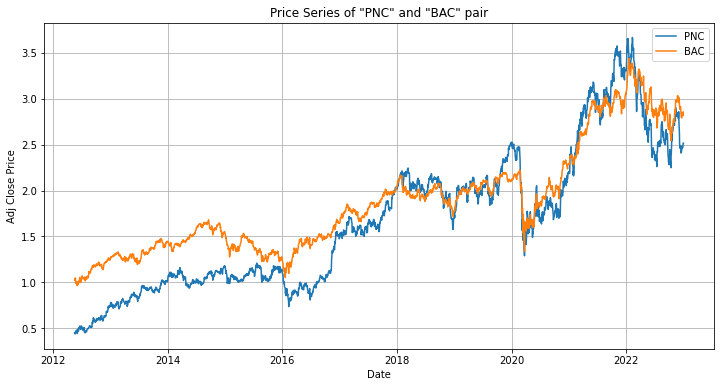

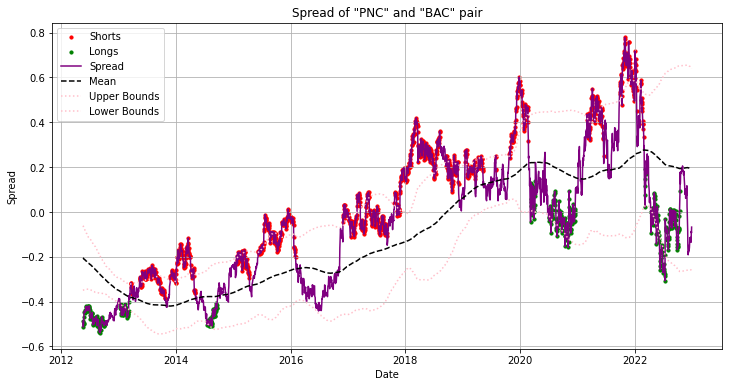

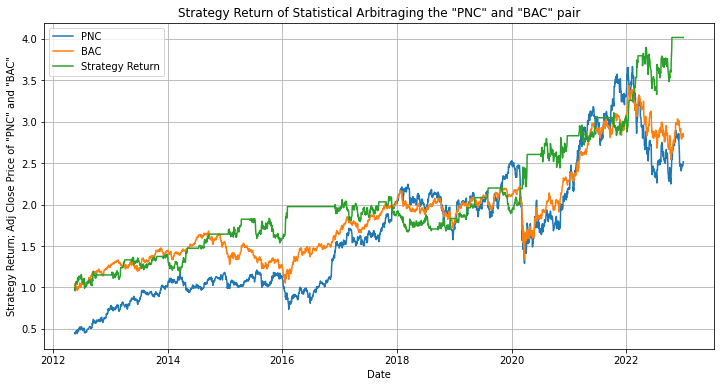

In [22]:
# PNC & BAC Pair
pair = coint_pairs[2]
p1 = list(pair)[0]
p2 = list(pair)[1]

temp_data = create_temp_data()
temp_data = strategy_signals_1(temp_data)

temp_data = temp_data.ffill().dropna()
temp_data["asset1"] = temp_data[p1].pct_change()
temp_data["asset2"] = temp_data[p2].pct_change()
temp_data["Return"] = (temp_data["asset1"] - (temp_data["Hedge"] * temp_data["asset2"])) * temp_data["Signals"].shift(1)
temp_data["cumulReturn"] = np.cumprod((temp_data["Return"]).fillna(0)+1)

longs = temp_data["Spread"][temp_data["Signals"] == 1.]
shorts = temp_data["Spread"][temp_data["Signals"] == -1.]

# Two Price Series
plt.figure(figsize = (12,6))
plt.plot(temp_data[p1])
plt.plot(temp_data[p2])
plt.legend([p1,p2])
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title(f'Price Series of "{p1}" and "{p2}" pair')
plt.grid()
plt.show()

# Spread
plt.figure(figsize = (12,6))
plt.scatter(shorts.index, shorts, c = "red" , s = 10 )
plt.scatter(longs.index, longs, c = "green" , s = 10 )
plt.plot(temp_data["Spread"], c = "purple")
plt.plot(temp_data["Mean"], linestyle = "dashed", c = "black")
plt.plot(temp_data["Upper"], linestyle = "dotted", c = "pink")
plt.plot(temp_data["Lower"], linestyle = "dotted", c = "pink")
plt.legend(["Shorts","Longs","Spread","Mean","Upper Bounds","Lower Bounds"])
plt.xlabel('Date')
plt.ylabel('Spread')
plt.title(f'Spread of "{p1}" and "{p2}" pair')
plt.grid()
plt.show()

# Plot the profits
plt.figure(figsize = (12,6))
plt.plot(temp_data[p1])
plt.plot(temp_data[p2])
plt.plot(temp_data["cumulReturn"])
plt.legend([p1,p2, "Strategy Return"])
plt.xlabel('Date')
plt.ylabel(f'Strategy Return; Adj Close Price of "{p1}" and "{p2}"')
plt.title(f'Strategy Return of Statistical Arbitraging the "{p1}" and "{p2}" pair')
plt.grid()
plt.show()


In [23]:
returns_m = (temp_data["Return"]+1).resample('M').prod() - 1
returns_m = pd.DataFrame(returns_m)
returns_m

,Return
Date,
2012-05-31,0.064051
2012-06-30,0.087005
2012-07-31,-0.111137
2012-08-31,0.000398
2012-09-30,0.082752
...,...
2022-08-31,0.037066
2022-09-30,-0.067339
2022-10-31,0.152993


In [24]:
### Percent of Winning Months

# Calculate the number of months with positive returns
nwin = (returns_m >0).sum().iloc[0]

# calculate the precentage of total
nwin/returns_m.shape[0]*100

47.65625

In [25]:
### Correlation with S&P500

# match up our returns for the series and the SP500 
returns_m['SP500'] = (yf.download('^GSPC')[['Adj Close']].pct_change()+1).resample('M').prod()-1

# get correlation
returns_m.corr()

[*********************100%%**********************]  1 of 1 completed


,Return,SP500
Return,1.00000,0.04961
SP500,0.04961,1.00000


In [26]:
### 5% VaR

# get the emprical VAR with the pandas method
returns_m.quantile(.05)

Return   -0.074082
SP500    -0.068134
Name: 0.05, dtype: float64

In [27]:
### Regression Metrics (alpha, beta, R-squared)

yr1 = pd.read_csv('DGS1.csv', parse_dates = True, index_col = 0).replace('.', np.NaN).astype(float).dropna()
yr1 = (yr1.resample('M').last()/100 + 1)**(1/12) - 1
yr1.columns = ['rf']
returns_m['rf'] = yr1.rf

# make sure returns df is in percentage units
returns_m = returns_m * 100

# get the excess return for both the benchmark and returns
returns_m['excess_strat'] = returns_m['Return'] - returns_m['rf']
returns_m['excess_SP500'] = returns_m['SP500'] - returns_m['rf']

import statsmodels.formula.api as smf
# Up Alpha and Up Beta:
updf = returns_m[returns_m['excess_SP500'] > 0]
smf.ols('excess_strat ~ excess_SP500', data = updf).fit().summary()

# Down Beta and Alpha: 
# downdf = returns_m[returns_m.excess_SP500 < 0]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           excess_strat   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     3.125
Date:                Mon, 04 Mar 2024   Prob (F-statistic):             0.0808
Time:                        16:32:30   Log-Likelihood:                -258.62
No. Observations:                  85   AIC:                             521.2
Df Residuals:                      83   BIC:                             526.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.2793      0.895     -0.312      0.756      -2.059       1.500
excess_SP500     0.4015      0.227      1.768      0.081      -0.050       0.853
==============================================================================
Omnibus:                        8.242   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.699
Skew:                           0.545   Prob(JB):                       0.0129
Kurtosis:                       4.126   Cond. No.                         6.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
### Sharpe Ratio

sharpe_strat = (returns_m['excess_strat'].mean() * 12) / (returns_m['excess_strat'].std() * np.sqrt(12))
print("Sharpe Ratio:", sharpe_strat)

Sharpe Ratio: 0.766878412215455


In [29]:
### Annualized Return

n_years = len(temp_data)/252
temp_data["cumulReturn"] = np.cumprod((temp_data["Return"]).fillna(0)+1)
AR_strat = (temp_data["cumulReturn"].iloc[-1] ** (1/n_years) - 1) * 100
print("Annualized Return:", AR_strat)

Annualized Return: 14.00234515392329


In [30]:
### Gini Coefficient

def GINI_COEF(returns):
    
    # get the number of periods -> will allow us to calculate the areas
    periods = len(returns)
    
    # sort values and sum to calculate the lorenz curve
    LorenzCurve = np.cumsum(returns.sort_values(by = "Returns"))
    # start from 0
    LorenzCurve = pd.concat([pd.DataFrame({'Returns': [0]}), LorenzCurve])
    Line = LorenzCurve.copy()
    # Form the line that encompasses A and B
    Line["Returns"] = np.arange(0,1+1/periods, 1/periods)*max(LorenzCurve["Returns"])
    
    # calculate the area of A+B
    UpArea = 0
    for i in range(1,len(returns)):
        UpArea = UpArea+ ((Line.iloc[i,:] - LorenzCurve.iloc[i,:] + Line.iloc[i-1,:] - LorenzCurve.iloc[i-1,:])/2)
    # calculate the area of A+B+C
    if min(LorenzCurve["Returns"]) < 0:
        AllArea = (np.abs(min(LorenzCurve["Returns"])) * periods) + ((max(LorenzCurve["Returns"]) * periods)/2)
    else:
        AllArea = ((max(LorenzCurve["Returns"]) * periods)/2)
    gini = UpArea / AllArea
    return(gini.iloc[0])

returns_g = returns_m[['Return']] # log returns
returns_g.columns = ['Returns']

GINI_COEF(returns_g)

0.7457470312191892

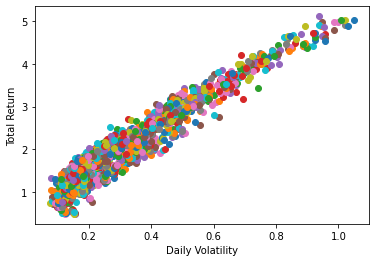

In [31]:
# Parameter Optimization

max_ret = 0

# parameters: moving period of mean, moving period of standard deviation, Z statistic
max_mean, max_sd, max_z = 0, 0, 0 

for mean in range(200,1000,100):
    for sd in range(50,600,50):
        for z in np.arange(0.5,2,0.1):            
            temp_data = create_temp_data(mean,sd,z)
            temp_data = strategy_signals_1(temp_data)
            temp_data = temp_data.ffill().dropna()
            temp_data["asset1"] = temp_data[p1].pct_change()
            temp_data["asset2"] = temp_data[p2].pct_change()
            temp_data["Return"] = (temp_data["asset1"] - (temp_data["Hedge"] * temp_data["asset2"])) * temp_data["Signals"].shift(1)
            temp_data["cumulReturn"] = np.cumprod((temp_data["Return"]).fillna(0)+1)
            ret = temp_data["cumulReturn"][-1]
            vol = temp_data["cumulReturn"].std(axis = 0)
            if ret > max_ret:
                max_ret = ret
                max_mean,max_sd,max_z = mean,sd,z
            plt.scatter(vol, ret)

plt.xlabel("Daily Volatility")
plt.ylabel("Total Return")
plt.show()


In [32]:
max_mean, max_sd, max_z

(500, 350, 1.4)